# Análisis Exploratorio de Datos (EDA)

## Dataset: Análisis de Características Geométricas

Este dataset fue obtenido de 
[Kaggle](https://www.kaggle.com/datasets/pranavraikokte/braintumorfeaturesextracted) y contiene características numéricas derivadas del análisis de imágenes de resonancia magnética cerebral. 

El archivo incluye **10 columnas** en total. Las primeras 9 son variables explicativas que describen propiedades geométricas y morfológicas extraídas del procesamiento de las imágenes. 
La columna final indica si la imagen corresponde a un caso con tumor (`1`) o sin tumor (`0`).
<!--  -->
### Variables del dataset:

- **Area**: área de la región de interés en la imagen
- **Perimeter**: perímetro de la región analizada
- **Convex Area**: área de la envolvente convexa de la región
- **Solidity**: relación entre el área del objeto y el área de su envolvente convexa (medida de convexidad)
- **Equivalent Diameter**: diámetro de un círculo con la misma área que la región
- **Major Axis**: longitud del eje mayor de la elipse que mejor ajusta a la región
- **Minor Axis**: longitud del eje menor de la elipse que mejor ajusta a la región
- **Eccentricity**: excentricidad de la elipse equivalente
- **Class**: variable binaria donde `1` indica presencia de tumor y `0` ausencia de tumor


<h3 style="font-size: 20px;">Importación del dataset y Exploración inicial</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


def print_summary(df):
    display(df.info())
    display(df.head())

In [2]:
df = pd.read_csv('../data/raw/dataset.csv')
print_summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           241 non-null    int64  
 1   Area                 241 non-null    float64
 2   Perimeter            241 non-null    float64
 3   Convex Area          241 non-null    float64
 4   Solidity             241 non-null    float64
 5   Equivalent Diameter  241 non-null    float64
 6   Major Axis           241 non-null    float64
 7   Minor Axis           241 non-null    float64
 8   Eccentricity         241 non-null    object 
 9   Class                241 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 19.0+ KB


None

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


Datos faltantes y valores nulos: No hay valores NaN pero si hay observaciones con todos sus atributos nulos.

La estrategia es eliminarlos del dataset

<Axes: >

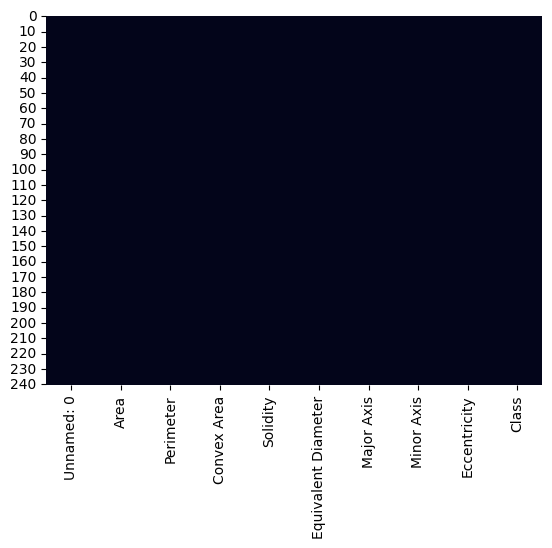

In [3]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)

<Axes: >

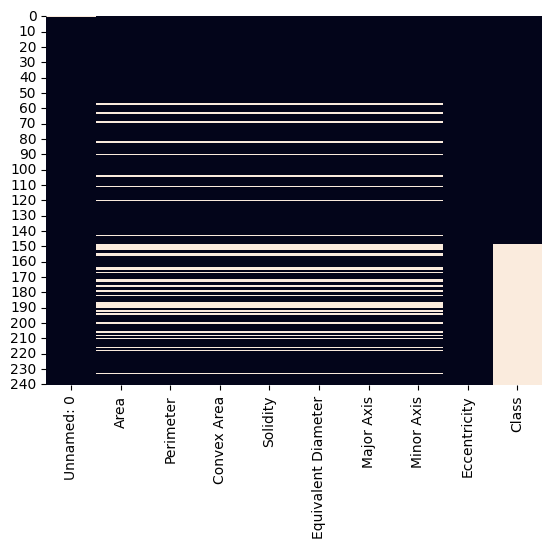

In [4]:
(df == 0).sum()
sns.heatmap(df == 0, cbar=False)

<Axes: >

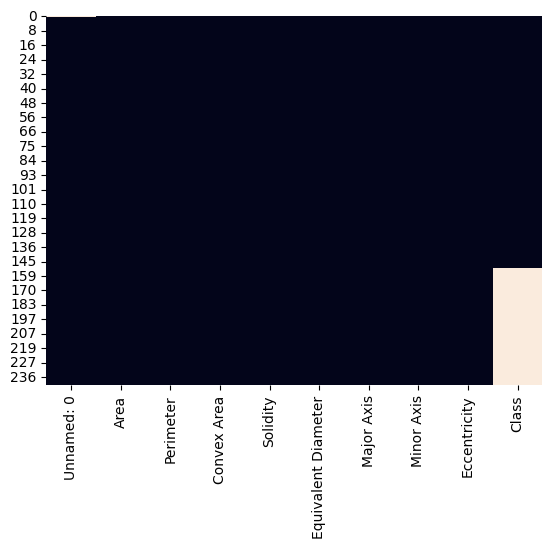

In [6]:
df = df[df.Area != 0]
(df == 0).sum()
sns.heatmap(df == 0, cbar=False)

Elimino la columna "Unnamed: 0" porque es un indice de observaciones

In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


La columna Eccentricity tiene lo que parecen ser valores complejos. Voy a generar dos nuevas columnas llamadas Eccentricity_Real y Eccentricity_Imag para manejar valores flotantes y no strings.

In [ ]:
df['Eccentricity_complex'] = df['Eccentricity'].apply(lambda x: complex(x))
df['Eccentricity_re'] = df['Eccentricity_complex'].apply(lambda x: x.real)
df['Eccentricity_im'] = df['Eccentricity_complex'].apply(lambda x: x.imag)

df.drop(['Eccentricity', 'Eccentricity_complex'], axis=1, inplace=True)

In [12]:
df = df[[col for col in df.columns if col != 'Class'] + ['Class']]

In [13]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity_re,Eccentricity_im,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,8.439724e-17,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.015395e-16,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,8.176507e-17,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,6.311038e-17,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,8.500079e-17,1.388168,1


Identificacion de variables numericas

In [14]:
numeric_variables = df[[col for col in df.columns if col != 'Class']].columns.to_list()
numeric_variables

['Area',
 'Perimeter',
 'Convex Area',
 'Solidity',
 'Equivalent Diameter',
 'Major Axis',
 'Minor Axis',
 'Eccentricity_re',
 'Eccentricity_im']

Generamos la matriz de correlacion de las variables numericas:



<Axes: >

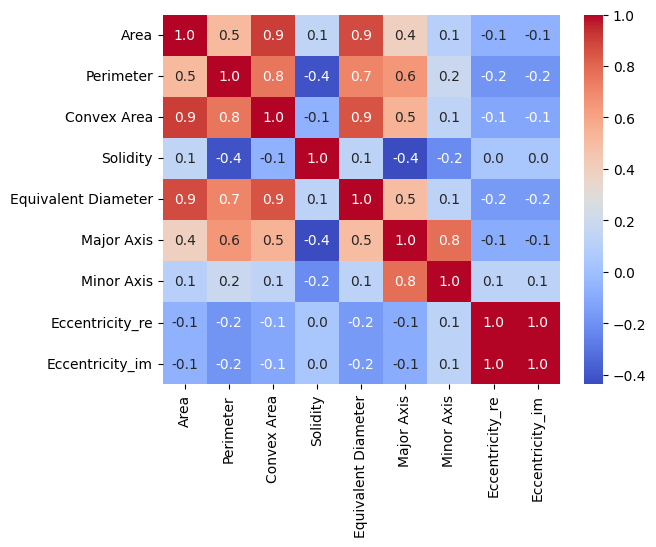

In [15]:
sns.heatmap(df[numeric_variables].corr(), annot=True, fmt=".1f", cmap='coolwarm')
# chequear que la normalizacion no cambia las correlaciones

* Se observa una correlacion exacta entre la variable Eccentricity_re y Eccentricity_im:  Se decide eliminar la variable Eccentricity_re.



In [32]:
df.drop('Eccentricity_re', axis=1, inplace=True)

Analisis de la correlacion entre la variable Eccentricity_im y la variable Objetivo (Class):

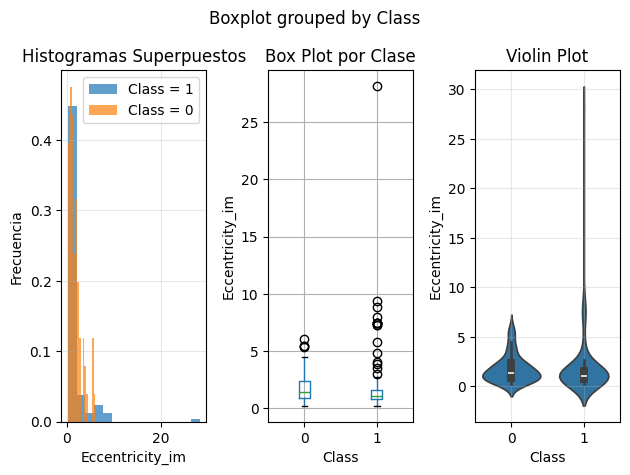

In [33]:
# Crear figura con subplots

numeric_col = 'Eccentricity_im'
target_col = 'Class'

fig, axes = plt.subplots(1, 3)
fig.suptitle(f'Relación entre {numeric_col} y {target_col}', fontsize=16, fontweight='bold')

# Obtener las clases únicas
classes = df[target_col].unique()

# 1. Histogramas superpuestos
ax1 = axes[0]
for class_val in classes:
    data = df[df[target_col] == class_val][numeric_col]
    ax1.hist(data, alpha=0.7, label=f'{target_col} = {class_val}', bins=15, density=True)
ax1.set_xlabel(numeric_col)
ax1.set_ylabel('Frecuencia')
ax1.set_title('Histogramas Superpuestos')
ax1.legend()
#ax1.set_xlim(0,5)
ax1.grid(True, alpha=0.3)

# 2. Box plot
ax2 = axes[1]
df.boxplot(column=numeric_col, by=target_col, ax=ax2)
ax2.set_title('Box Plot por Clase')
ax2.set_xlabel(target_col)
ax2.set_ylabel(numeric_col)
plt.setp(ax2, title='Box Plot por Clase')

# 3. Violin plot
ax3 = axes[2]
sns.violinplot(data=df, x=target_col, y=numeric_col, ax=ax3)
ax3.set_title('Violin Plot')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Las distribuciones de la variable para cada clase son muy similares. No aporta informacion significativa. Se opta por eliminar la variable Eccentricity_im tambien

In [34]:
df.drop('Eccentricity_im', axis=1, inplace=True)

In [37]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1
...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,0


Hay una notable correlacion entre las siguientes variables (>=0.9):
* Area vs Convex area
* Area vs Equivakent Diameter
* Convex Area vs Equivalent Diameter

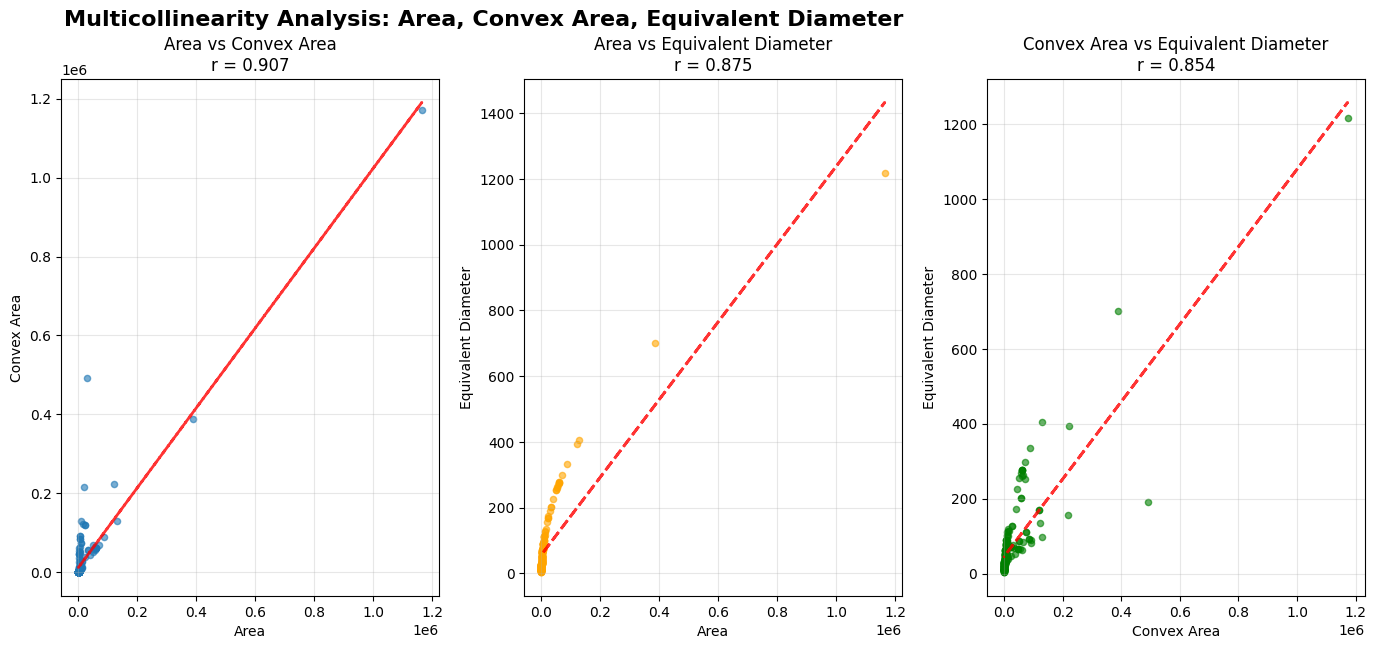

In [ ]:
var1 = 'Area'
var2 = 'Convex Area'
var3 = 'Equivalent Diameter'

vars_df = df[[var1, var2, var3]]
corr_matrix = vars_df.corr()

figsize=(18, 12)
fig = plt.figure(figsize=figsize)
fig.suptitle(f'Multicollinearity Analysis: {var1}, {var2}, {var3}', fontsize=16, fontweight='bold')

ax2 = plt.subplot(2, 4, 2)
# Scatter plot var1 vs var2
ax2.scatter(df[var1], df[var2], alpha=0.6, s=20)
z = np.polyfit(df[var1], df[var2], 1)
p = np.poly1d(z)
ax2.plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)
ax2.set_xlabel(var1)
ax2.set_ylabel(var2)
ax2.set_title(f'{var1} vs {var2}\nr = {corr_matrix.loc[var1, var2]:.3f}')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(2, 4, 3)
# Scatter plot var1 vs var3
ax3.scatter(df[var1], df[var3], alpha=0.6, s=20, color='orange')
z = np.polyfit(df[var1], df[var3], 1)
p = np.poly1d(z)
ax3.plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)
ax3.set_xlabel(var1)
ax3.set_ylabel(var3)
ax3.set_title(f'{var1} vs {var3}\nr = {corr_matrix.loc[var1, var3]:.3f}')
ax3.grid(True, alpha=0.3)

ax4 = plt.subplot(2, 4, 4)
# Scatter plot var2 vs var3
ax4.scatter(df[var2], df[var3], alpha=0.6, s=20, color='green')
z = np.polyfit(df[var2], df[var3], 1)
p = np.poly1d(z)
ax4.plot(df[var2], p(df[var2]), "r--", alpha=0.8, linewidth=2)
ax4.set_xlabel(var2)
ax4.set_ylabel(var3)
ax4.set_title(f'{var2} vs {var3}\nr = {corr_matrix.loc[var2, var3]:.3f}')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Hacemos la prueba con el cuadrado del Diametro Equivalente

In [42]:
df['Diametro Equivalente cuadrado'] = df['Equivalent Diameter'] ** 2

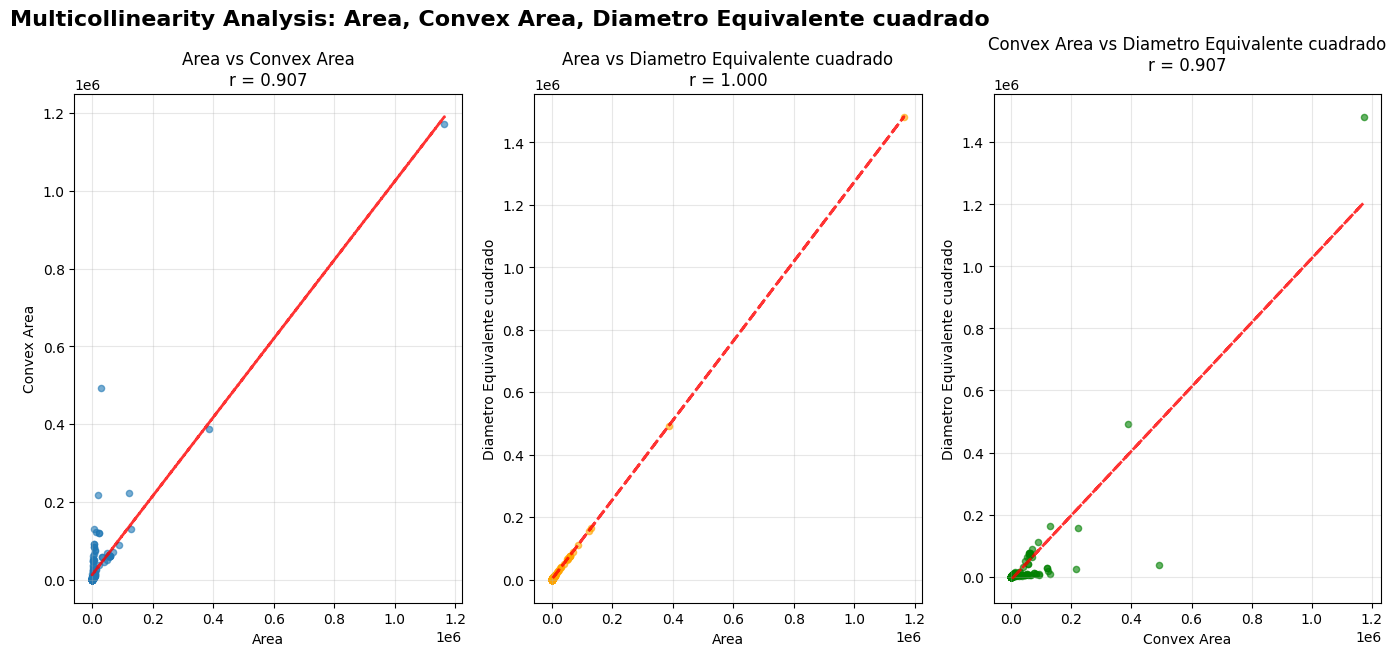

In [43]:
var1 = 'Area'
var2 = 'Convex Area'
var3 = 'Diametro Equivalente cuadrado'

vars_df = df[[var1, var2, var3]]
corr_matrix = vars_df.corr()

figsize=(18, 12)
fig = plt.figure(figsize=figsize)
fig.suptitle(f'Multicollinearity Analysis: {var1}, {var2}, {var3}', fontsize=16, fontweight='bold')

ax2 = plt.subplot(2, 4, 2)
# Scatter plot var1 vs var2
ax2.scatter(df[var1], df[var2], alpha=0.6, s=20)
z = np.polyfit(df[var1], df[var2], 1)
p = np.poly1d(z)
ax2.plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)
ax2.set_xlabel(var1)
ax2.set_ylabel(var2)
ax2.set_title(f'{var1} vs {var2}\nr = {corr_matrix.loc[var1, var2]:.3f}')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(2, 4, 3)
# Scatter plot var1 vs var3
ax3.scatter(df[var1], df[var3], alpha=0.6, s=20, color='orange')
z = np.polyfit(df[var1], df[var3], 1)
p = np.poly1d(z)
ax3.plot(df[var1], p(df[var1]), "r--", alpha=0.8, linewidth=2)
ax3.set_xlabel(var1)
ax3.set_ylabel(var3)
ax3.set_title(f'{var1} vs {var3}\nr = {corr_matrix.loc[var1, var3]:.3f}')
ax3.grid(True, alpha=0.3)

ax4 = plt.subplot(2, 4, 4)
# Scatter plot var2 vs var3
ax4.scatter(df[var2], df[var3], alpha=0.6, s=20, color='green')
z = np.polyfit(df[var2], df[var3], 1)
p = np.poly1d(z)
ax4.plot(df[var2], p(df[var2]), "r--", alpha=0.8, linewidth=2)
ax4.set_xlabel(var2)
ax4.set_ylabel(var3)
ax4.set_title(f'{var2} vs {var3}\nr = {corr_matrix.loc[var2, var3]:.3f}')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Observamos una correlacion perfecta. Se decide eliminar al variable "Diametro Equivalente" porque la combinacion lineal de su cuadrado puede ser representada por el Area

In [45]:
df.drop(['Equivalent Diameter', 'Diametro Equivalente cuadrado'], axis=1, inplace=True)
df.head()

,Area,Perimeter,Convex Area,Solidity,Major Axis,Minor Axis,Class
0,6314.5,521.972649,9855.5,0.640708,86.297539,146.952896,1
1,52776.5,1189.820409,59947.0,0.880386,209.590240,405.861420,1
2,50232.5,1415.349410,69628.5,0.721436,223.632736,373.077637,1
3,4486.0,275.622365,4741.5,0.946114,64.818382,93.083397,1
4,145.0,92.083260,323.5,0.448223,16.900970,28.915043,1


Guardamos archivo con processing hecho

In [ ]:
df.to_csv('../data/processed/processed_train.csv', index=False)